## Presentation

In [ ]:
import sys
print(sys.version)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [ ]:
dataset = pd.read_excel('cars.xlsx')
dataset = dataset.dropna()

In [ ]:
dataset.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21.0,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21.0,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16.0,26.0,p,compact


* **Manufacturer**: manufacturer name
* **Model**: model name
* **Displ**: engine displacement, in litres
* **Year**: year of manufacture
* **Cyl**: number of cylinders
* **Trans**: type of transmission
* **Drv**: the type of drive train, where f = front-wheel drive, r = rear wheel drive, 4 = 4wd
* **Cty**: city miles per gallon
* **Hwy**: highway miles per gallon
* **Fl**: fuel type
* **Class**: "type" of car

In [ ]:
# Assume dataset is already loaded from a file
# dataset = pd.read_csv('your_file.csv')

# Split the data into features (X) and target (y)
X = dataset.drop('hwy', axis=1)
y = dataset['hwy']

# Define which columns are numbers and which are categories
numeric_cols = ['displ', 'year', 'cyl', 'cty']
category_cols = ['manufacturer', 'model', 'trans', 'drv', 'fl', 'class']

# Change number columns to float type, turn bad values into NaN
for col in numeric_cols:
  X[col] = pd.to_numeric(X[col], errors='coerce')

# Change category columns to string type
for col in category_cols:
  X[col] = X[col].astype(str)

# Create a tool to fill missing numbers with the average
num_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = num_imputer.fit_transform(X[numeric_cols])

# Create a tool to fill missing categories with the most common value
cat_imputer = SimpleImputer(strategy='most_frequent')
X[category_cols] = cat_imputer.fit_transform(X[category_cols])

# Create a tool to fill missing target values with the average
y_imputer = SimpleImputer(strategy='mean')
y = y_imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Turn category columns into numbers using one-hot encoding
X_encoded = pd.get_dummies(X, columns=category_cols, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Show how good the model is
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R²:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.0776897081795083
Mean Squared Error: 1.8632854006723027
Root Mean Squared Error: 1.365022124609086
R²: 0.9295775313192727


* The value of MAE = 1.0777 means that, on average, the model's predictions deviate from the actual values of hwy by 1.0777 MPG. *The error of 1.0777 MPG is relatively small for the task of predicting fuel consumption, which indicates good accuracy of the model.*

* MSE is the average square error. This value is more difficult to interpret directly because of the units of measurement (MPEG)^2, but a lower MSE value indicates smaller errors in predictions.

* RMSE = 1.3650 means that, on average, the model's predictions deviate from the actual hwy values by 1.3650 MPG. An error of 1.3650 MPG also indicates good model accuracy, but it is slightly higher than MAE, which may indicate the presence of some outliers or large deviations in predictions.

* R^2=0.9296 means that 92.96% of the variation in hwy values is explained by independent variables (such as manufacturer, displl, year, etc.). This is a very high indicator, indicating that the model describes the data well.

In [ ]:
# Function to predict highway fuel consumption for new car data
def predict_hwy(new_car_data, num_imputer, cat_imputer, num_cols, cat_cols, encoded_cols, model):
  # Change number columns to float type, turn bad values into NaN
  for col in num_cols:
    new_car_data[col] = pd.to_numeric(new_car_data[col], errors='coerce')

  # Change category columns to string type
  for col in cat_cols:
    new_car_data[col] = new_car_data[col].astype(str)

  # Fill missing numbers with the average
  new_car_data[num_cols] = num_imputer.transform(new_car_data[num_cols])

  # Fill missing categories with the most common value
  new_car_data[cat_cols] = cat_imputer.transform(new_car_data[cat_cols])

  # Turn category columns into numbers using one-hot encoding
  new_car_encoded = pd.get_dummies(new_car_data, columns=cat_cols, drop_first=True)

  # Add any missing columns from the original encoded data and set them to 0
  missing_columns = set(encoded_cols) - set(new_car_encoded.columns)
  for col in missing_columns:
    new_car_encoded[col] = 0
  new_car_encoded = new_car_encoded[encoded_cols]

  # Make the prediction
  prediction = model.predict(new_car_encoded)
  return prediction[0]

# Create a new car data example
new_car = pd.DataFrame({
  'manufacturer': ['audi'],
  'model': ['a4'],
  'displ': [2.0],
  'year': [2008],
  'cyl': [4],
  'trans': ['manual(m6)'],
  'drv': ['f'],
  'cty': [20.0],
  'fl': ['p'],
  'class': ['compact']
})

# Make a prediction for the new car
predicted_hwy = predict_hwy(
  new_car,
  num_imputer=num_imputer,
  cat_imputer=cat_imputer,
  num_cols=numeric_cols,
  cat_cols=category_cols,
  encoded_cols=X_encoded.columns,
  model=model
)
print(f'Predicted Highway Fuel Consumption (hwy): {predicted_hwy:.2f} MPG')

Predicted Highway Fuel Consumption (hwy): 25.77 MPG


## Data preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("kc_house_data.csv",index_col="id")
df = data.copy()

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 1

In [ ]:
# changing dtype with pandas
df['date']= pd.to_datetime(df['date'])

In [ ]:
# cheking dubplicated
subset_list = df.drop("date",axis=1).columns # hypotesis about date
df.duplicated(subset=subset_list).sum()
df.drop_duplicates(subset=subset_list,inplace=True)

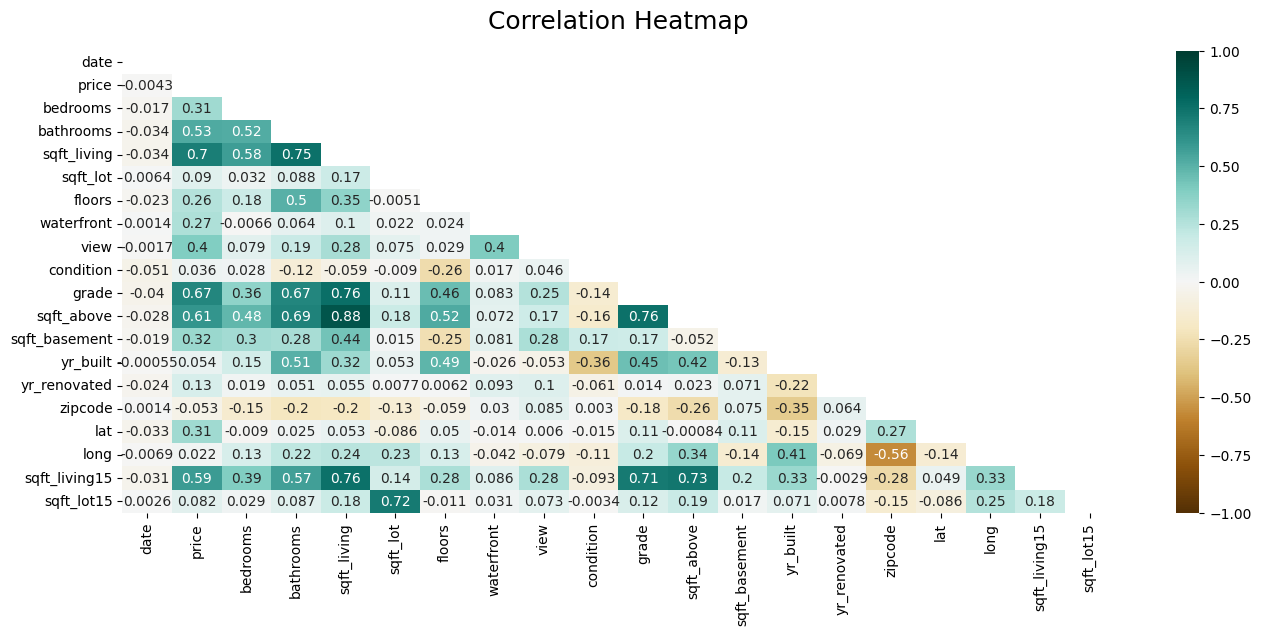

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

If I had a correlation 1 or -1 otamaticly drop one of these columns

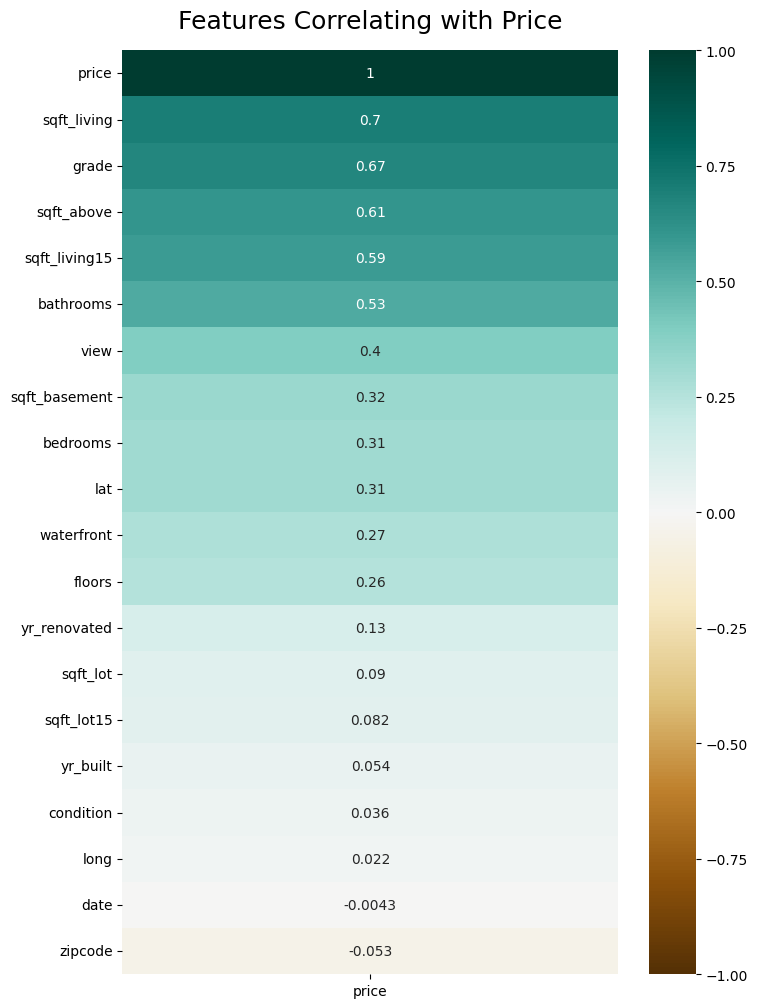

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.drop(["lat","long","date"],axis=1,inplace=True)

In [ ]:
y = df[["price"]]
X = df.drop("price",axis=1)

In [ ]:
scaler = MinMaxScaler()
X_cols = X.columns
X_index = X.index
X = scaler.fit_transform(X)
X = pd.DataFrame(data=X,columns=X_cols,index=X_index)

In [ ]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,
7129300520,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.161934,0.005742
6414100192,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.222165,0.008027
5631500400,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.399415,0.008513
2487200875,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.165376,0.004996
1954400510,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.241094,0.007871


### Dealing with Categorical columns

In [ ]:
# if ordinal
# from sklearn.preprocessing import LabelEncoder
# scaler = LabelEncoder()

# #if 1 column
# X["col"] = scaler.fit_transform(X["col"])

# # if multiple Columns
# list_1 = ["col_1","col_2","col_3"]
# for i in list_1:
#     X[i] = scaler.fit_transform(X[i])

In [ ]:
# when nominal

# pd.get_dummies(X[["col_1","col_2"]],prefix="dummy",drop_first=True)

### Outlier dealing

In [ ]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062


In [ ]:
num_cols = ["bathrooms","sqft_living","floors","sqft_above", "yr_built","zipcode","sqft_living15",]

In [ ]:
X_cols = num_cols

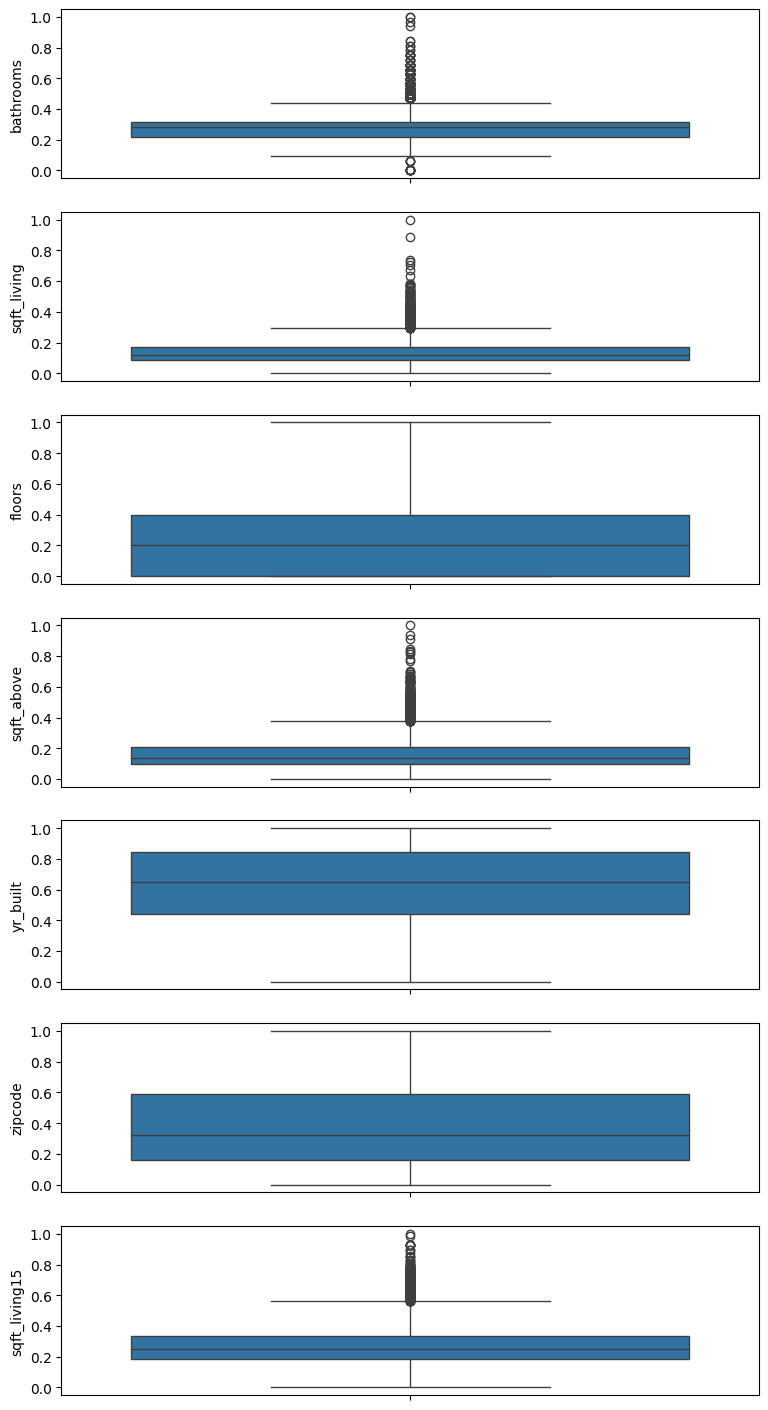

In [ ]:
fig, axes = plt.subplots(nrows=len(X_cols),figsize=(9,18))
for i in range(len(X_cols)):
  sns.boxplot(ax=axes[i],y=X_cols[i],data=X)

In [ ]:
# treating outliers
def outlier_detection(cols):
  Q1,Q3 = np.percentile(cols,[25,75])
  IQR = Q3-Q1
  upper_bound = Q3 + (1.5*IQR)
  lower_bound = Q1 - (1.5*IQR)
  return upper_bound,lower_bound

In [ ]:
for cols in X_cols:
  upper_bound,lower_bound = outlier_detection(X[cols])
  X[cols] = np.clip(X[cols],a_min=lower_bound,a_max=upper_bound)

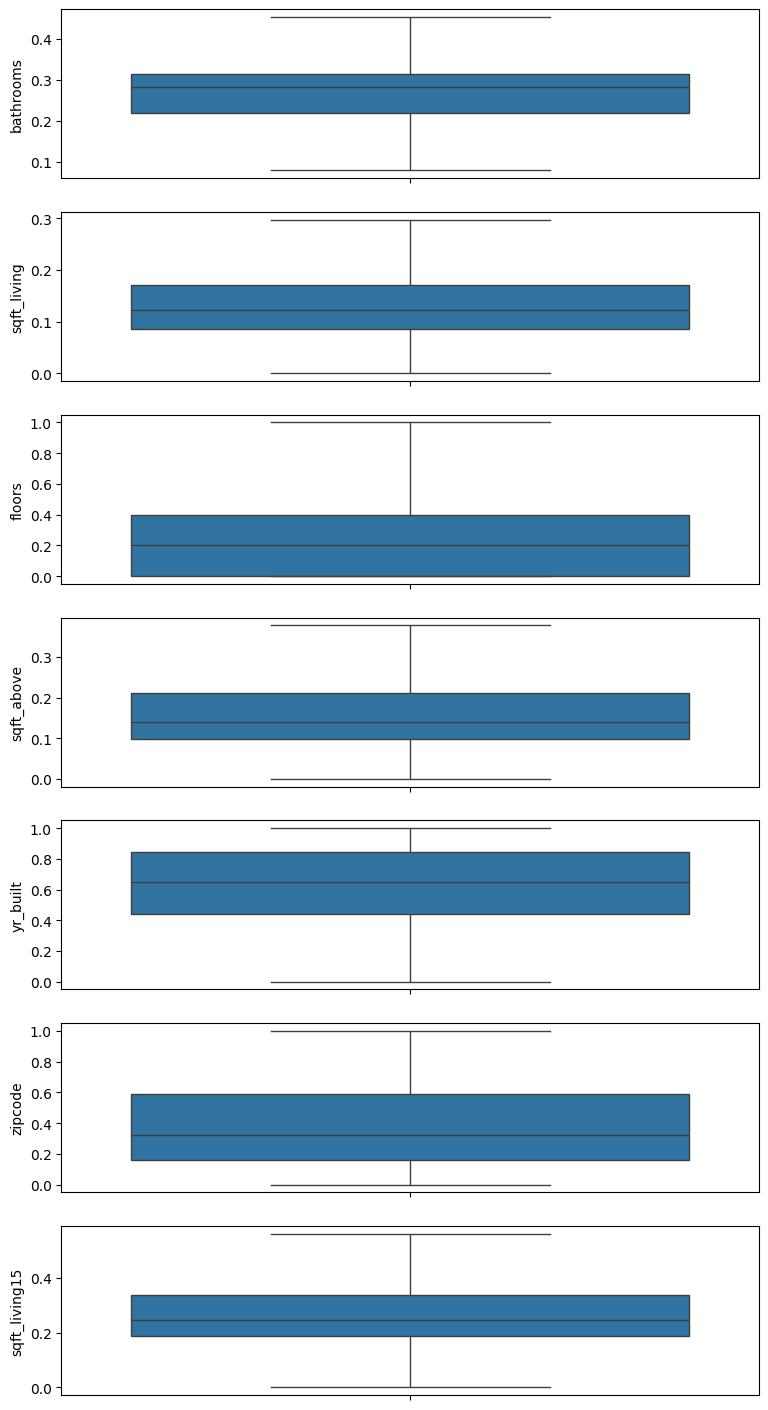

In [ ]:
fig,axes = plt.subplots(nrows=len(num_cols),figsize=(9,18))
for i in range(len(num_cols)):
  sns.boxplot(data=X,ax=axes[i],y=num_cols[i])

## Feature engineering

In [ ]:
import pandas as pd
import numpy as np
# Python code for binarization
from sklearn.preprocessing import Binarizer

In [ ]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv("pima-indians-diabetes.csv", names=names)
array = dataframe.values

In [ ]:
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
# separate array into input and output components
# inarize data (set feature values to 0 or 1) according to a threshold
X = array[:,0:8]
Y = array[:,8]
X
binarizer = Binarizer(threshold=7.0).fit(X)
binaryX = binarizer.transform(X)

In [ ]:
binaryX

array([[0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.]])

In [ ]:
# summarize transformed data
np.set_printoptions(precision=3)
binaryX[0:5,:]

array([[0., 1., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 0., 1.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

X = ct.fit_transform(X)
X

array([[ 0.   ,  0.   ,  0.   , ..., 33.6  ,  0.627, 50.   ],
       [ 0.   ,  1.   ,  0.   , ..., 26.6  ,  0.351, 31.   ],
       [ 0.   ,  0.   ,  0.   , ..., 23.3  ,  0.672, 32.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ..., 26.2  ,  0.245, 30.   ],
       [ 0.   ,  1.   ,  0.   , ..., 30.1  ,  0.349, 47.   ],
       [ 0.   ,  1.   ,  0.   , ..., 30.4  ,  0.315, 23.   ]])

### Convert categorical variable into dummy/indicator variables

In [ ]:
data = {'Gender': ['Male', 'Female', 'Male', 'Male'],
        'Age': [20, 21, 19, 18],
        'Salary': [600, 700, 500, 500]}
data = pd.DataFrame(data)
data

,Gender,Age,Salary
0,Male,20,600
1,Female,21,700
2,Male,19,500
3,Male,18,500


In [ ]:
pd.get_dummies(data, prefix_sep='_', drop_first=False)

,Age,Salary,Gender_Female,Gender_Male
0,20,600,False,True
1,21,700,True,False
2,19,500,False,True
3,18,500,False,True


In [ ]:
pd.get_dummies(data, prefix_sep='_', drop_first=True)

,Age,Salary,Gender_Male
0,20,600,True
1,21,700,False
2,19,500,True
3,18,500,True


### StandardScaler

In [ ]:
# Python code to Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv("pima-indians-diabetes.csv", names=names)
array = dataframe.values

In [ ]:
# separate array into input and output components
# Standardize features by removing the mean and scaling to unit variance
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

In [ ]:
rescaledX

array([[ 0.64 ,  0.848,  0.15 , ...,  0.204,  0.468,  1.426],
       [-0.845, -1.123, -0.161, ..., -0.684, -0.365, -0.191],
       [ 1.234,  1.944, -0.264, ..., -1.103,  0.604, -0.106],
       ...,
       [ 0.343,  0.003,  0.15 , ..., -0.735, -0.685, -0.276],
       [-0.845,  0.16 , -0.471, ..., -0.24 , -0.371,  1.171],
       [-0.845, -0.873,  0.046, ..., -0.202, -0.474, -0.871]])

In [ ]:
# summarize transformed data
np.set_printoptions(precision=3)
rescaledX[0:5,:]

array([[ 0.64 ,  0.848,  0.15 ,  0.907, -0.693,  0.204,  0.468,  1.426],
       [-0.845, -1.123, -0.161,  0.531, -0.693, -0.684, -0.365, -0.191],
       [ 1.234,  1.944, -0.264, -1.288, -0.693, -1.103,  0.604, -0.106],
       [-0.845, -0.998, -0.161,  0.155,  0.123, -0.494, -0.921, -1.042],
       [-1.142,  0.504, -1.505,  0.907,  0.766,  1.41 ,  5.485, -0.02 ]])

In [ ]:
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Introduction to Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
x = np.array([10, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([10, 14, 20, 32, 37, 50])

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x, y)

LinearRegression()

In [ ]:
model = LinearRegression().fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9857070086243349


In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.4219178082191739
slope: [0.867]


In [ ]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 9.096 13.433 22.107 30.781 39.455 48.129]


In [ ]:
y

array([10, 14, 20, 32, 37, 50])

### Simple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('Weather.csv')
dataset = data.copy()

In [ ]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.tail(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
23713,11606,1944-11-22,4.826,NaN,28.888889,24.444444,26.666667,0.0,1,44,11,22,0.19,NaN,NaN,84.0,76.0,80.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23714,11606,1944-11-23,10.414,NaN,27.222222,23.333333,25.555556,0.0,1,44,11,23,0.41,NaN,NaN,81.0,74.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23715,11606,1944-11-24,4.572,NaN,29.444444,24.444444,26.666667,0.0,1,44,11,24,0.18,NaN,NaN,85.0,76.0,80.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23716,11606,1944-11-25,0,NaN,30.000000,26.666667,28.333333,0.0,NaN,44,11,25,0,NaN,NaN,86.0,80.0,83.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23717,11606,1944-11-26,1.016,NaN,30.000000,23.888889,26.666667,0.0,1,44,11,26,0.04,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.shape

(23718, 31)

In [ ]:
pip install missingno

In [ ]:
import missingno as msno

<Axes: >

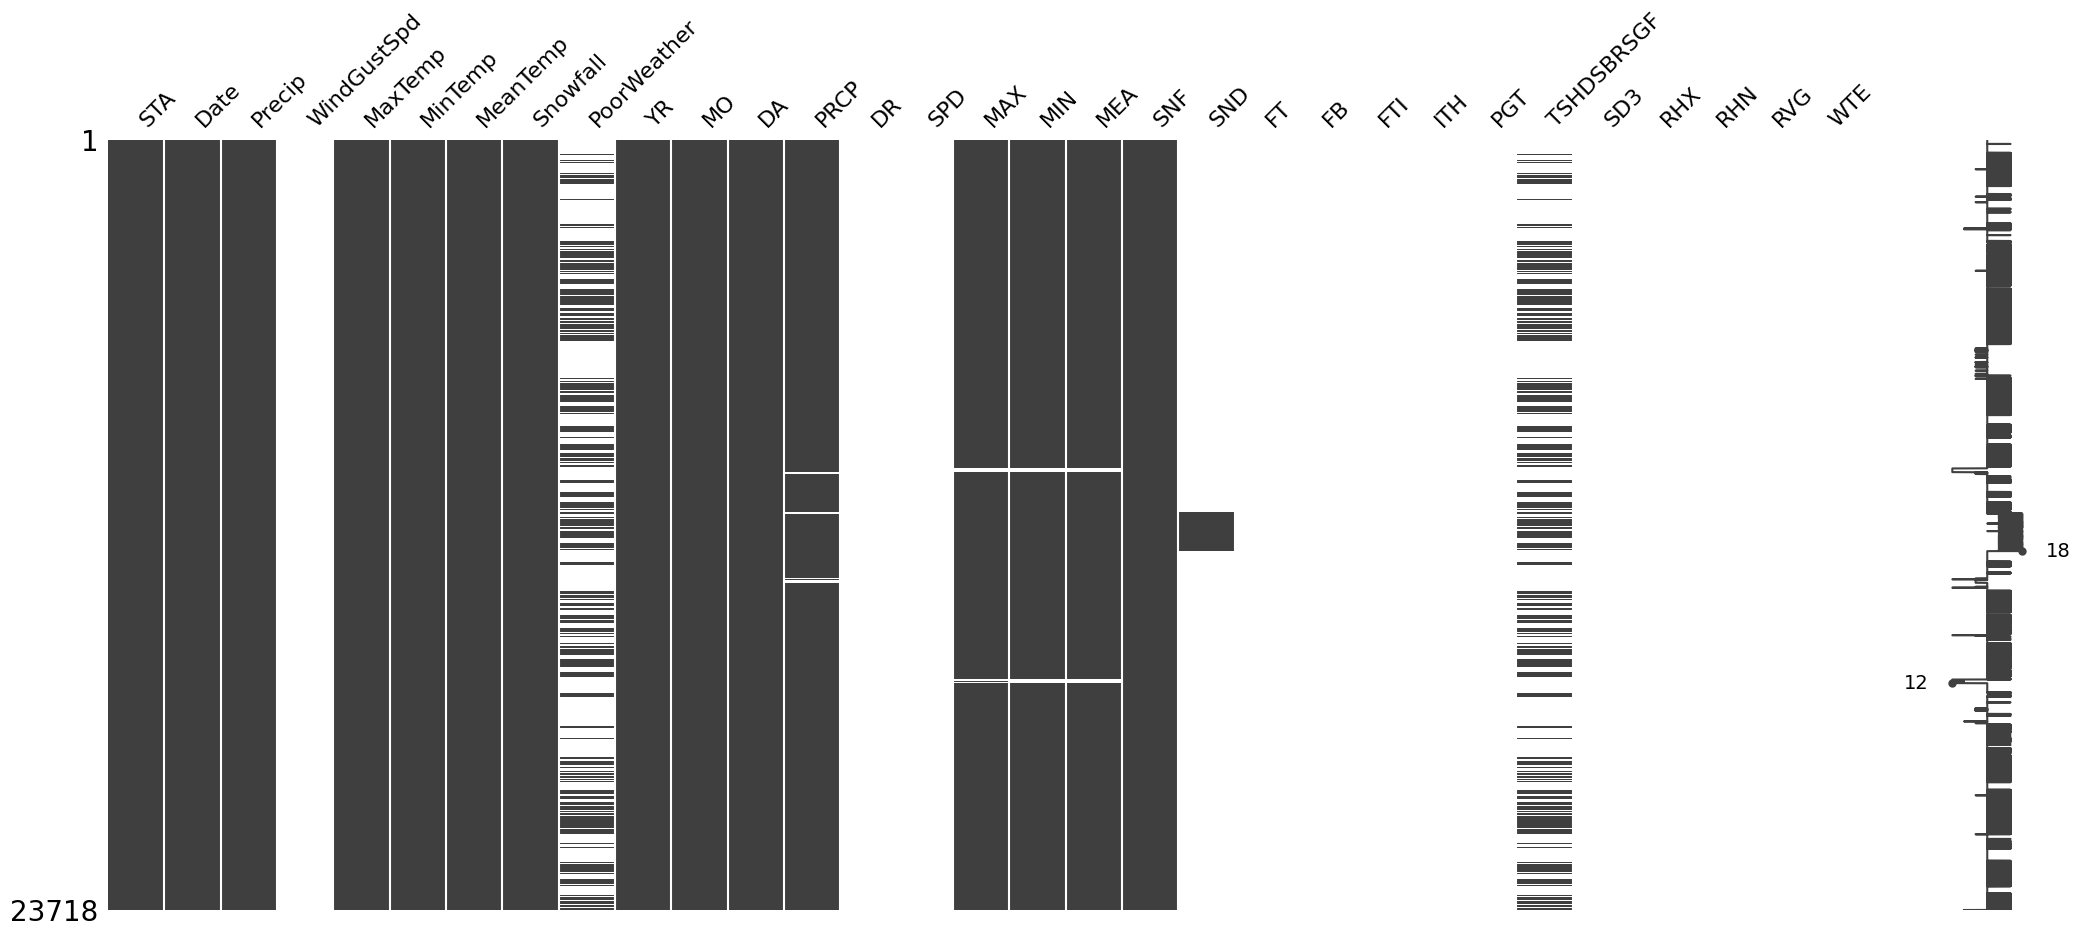

In [ ]:
msno.matrix(dataset)

<Axes: >

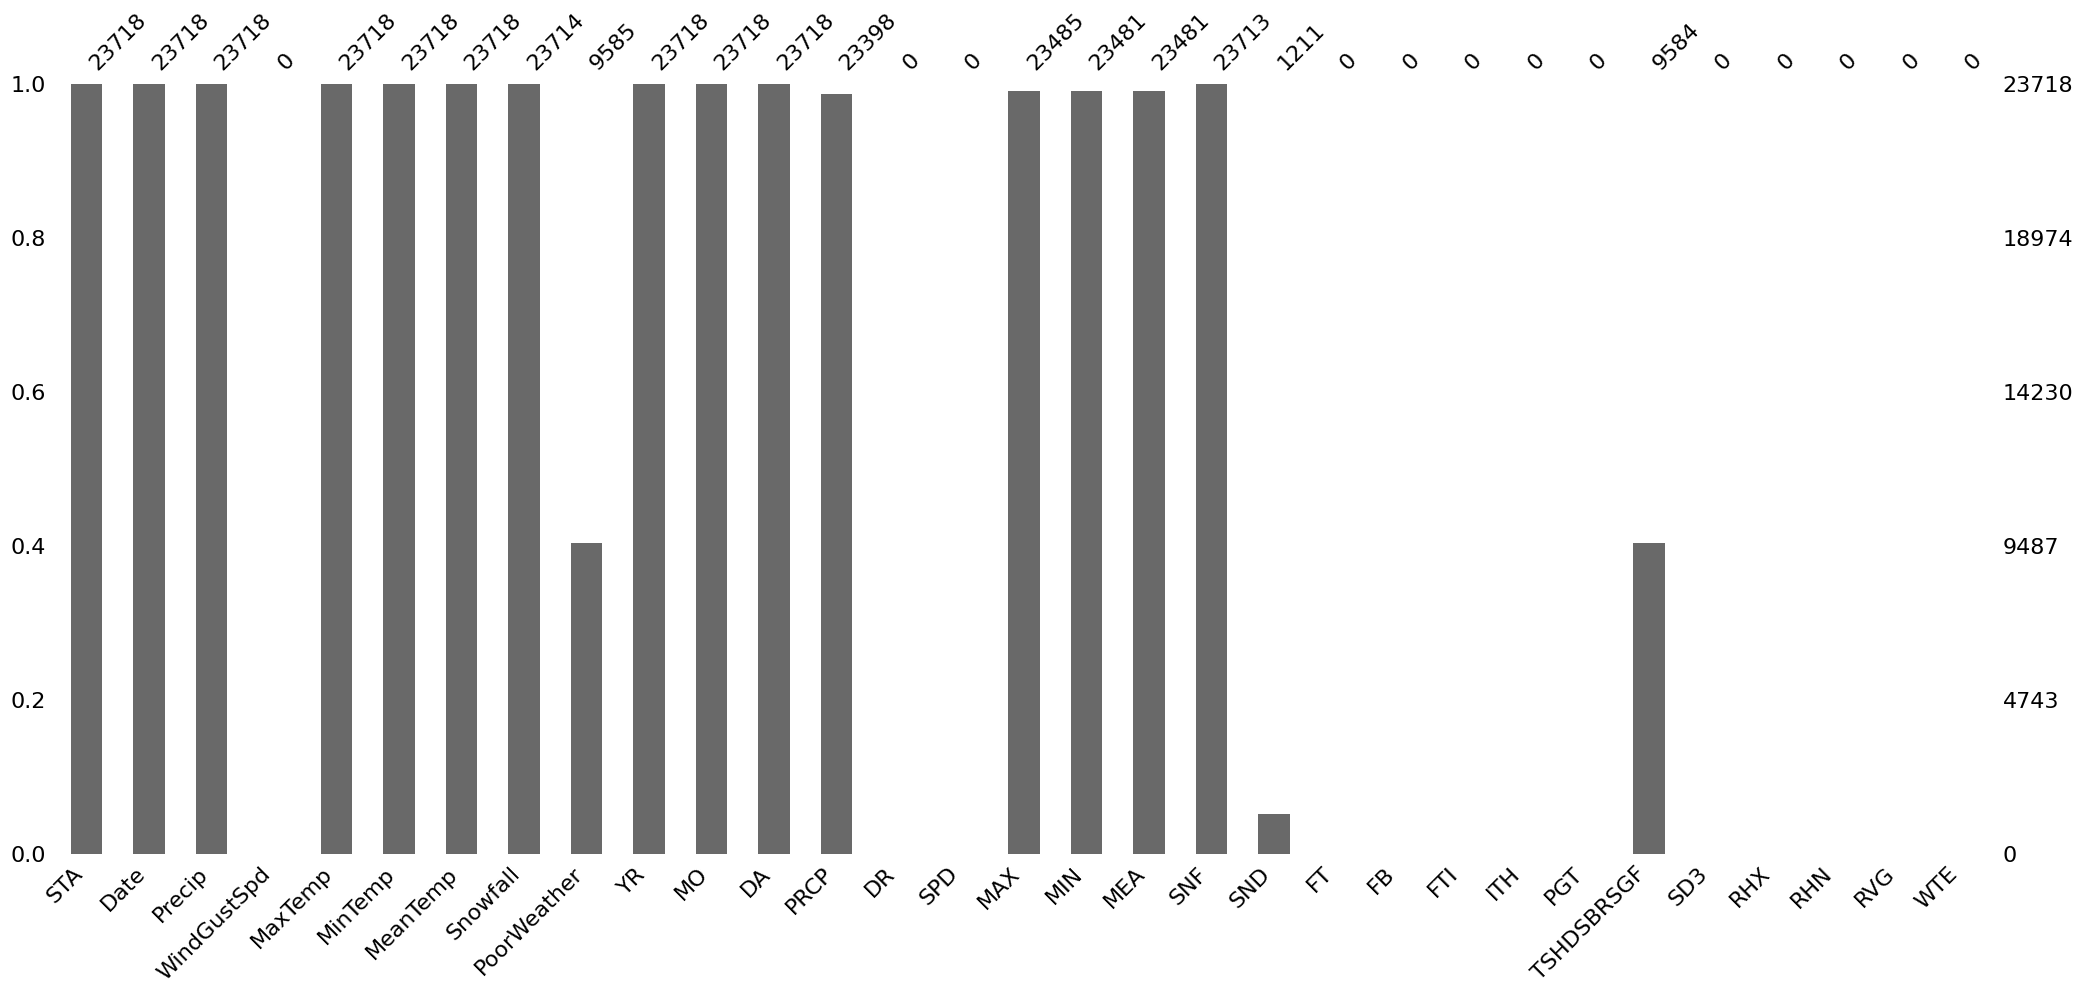

In [ ]:
msno.bar(dataset)

In [ ]:
dataset.isnull().sum()

,0
STA,0
Date,0
Precip,0
WindGustSpd,23718
MaxTemp,0
MinTemp,0
MeanTemp,0
Snowfall,4
PoorWeather,14133
YR,0


In [ ]:
dataset.iloc[:,-12:]

,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23713,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23714,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23715,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
23716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.drop(labels=dataset.iloc[:,-12:].columns,inplace=True,axis=1)

In [ ]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SNF
count,23718.000000,0.0,23718.000000,23718.000000,23718.000000,23714.0,23718.000000,23718.000000,23718.000000,0.0,0.0,23485.000000,23481.000000,23481.000000,23713.0
mean,10790.522852,NaN,29.716320,22.154739,25.935155,0.0,43.598912,6.789864,15.799604,NaN,NaN,86.337535,72.600826,79.474043,0.0
std,484.715692,NaN,5.273870,4.544255,4.755754,0.0,1.222056,3.457112,8.795097,NaN,NaN,4.216562,3.889824,3.341701,0.0
min,10001.000000,NaN,-17.777778,-17.777778,-17.777778,0.0,40.000000,1.000000,1.000000,NaN,NaN,63.000000,51.000000,60.000000,0.0
25%,10505.000000,NaN,28.888889,21.666667,25.555556,0.0,43.000000,4.000000,8.000000,NaN,NaN,84.000000,71.000000,78.000000,0.0
50%,10718.000000,NaN,30.555556,22.777778,26.666667,0.0,44.000000,7.000000,16.000000,NaN,NaN,87.000000,73.000000,80.000000,0.0
75%,10807.000000,NaN,31.666667,23.888889,27.777778,0.0,45.000000,10.000000,23.000000,NaN,NaN,89.000000,75.000000,82.000000,0.0
max,11606.000000,NaN,38.888889,28.888889,31.666667,0.0,45.000000,12.000000,31.000000,NaN,NaN,102.000000,84.000000,89.000000,0.0


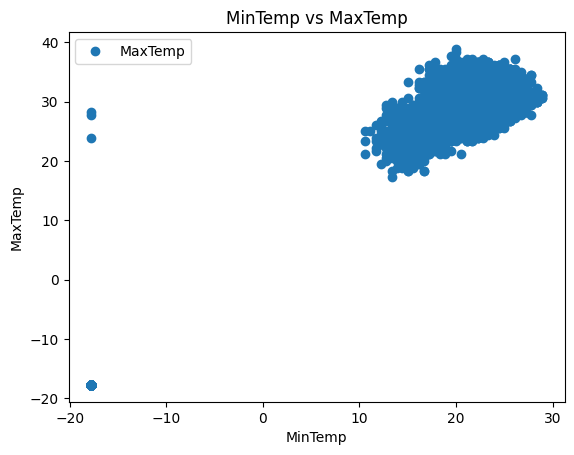

In [ ]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [ ]:
def outlier_detection(cols):
    Q1,Q3 = np.percentile(cols,[25,75])
    IQR = Q3-Q1
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)
    return upper_bound,lower_bound

In [ ]:
list_1 = ["MinTemp","MaxTemp"]

In [ ]:
for cols in list_1:
    upper_bound,lower_bound = outlier_detection(dataset[cols])
    dataset[cols] = np.clip(dataset[cols],a_min=lower_bound,a_max=upper_bound)

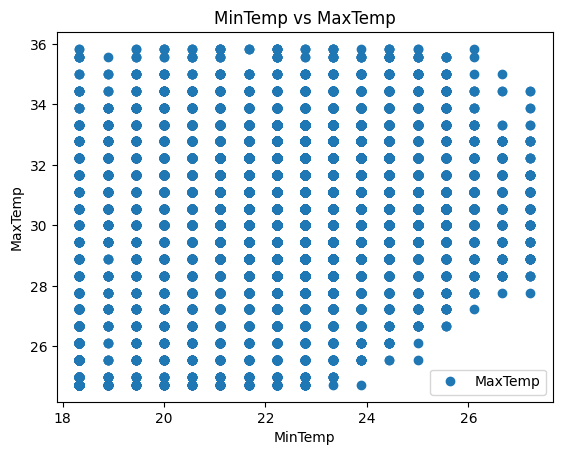

In [ ]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

<ipython-input-79-a2ba3095821d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seabornInstance.distplot(dataset['MaxTemp'])


<Axes: xlabel='MaxTemp', ylabel='Density'>

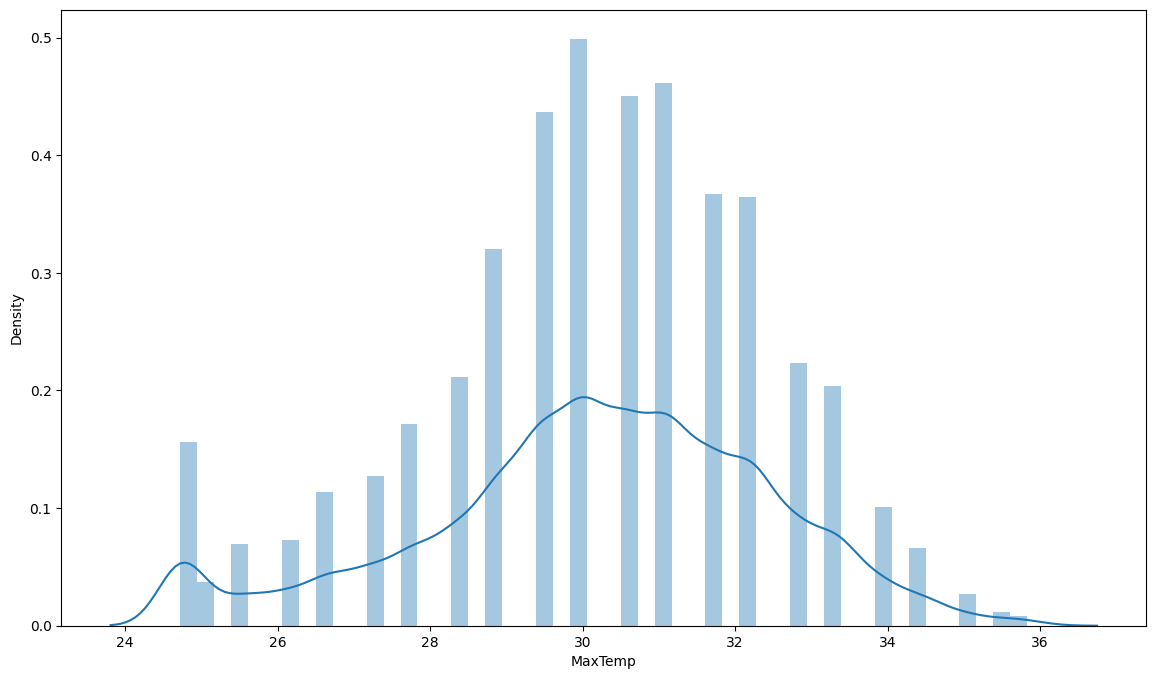

In [ ]:
plt.figure(figsize=(14,8))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [ ]:
dataset['MinTemp'].values.mean

<function ndarray.mean>

In [ ]:
dataset['MinTemp'].values.reshape(-1,1)

array([[22.222],
       [21.667],
       [22.222],
       ...,
       [24.444],
       [26.667],
       [23.889]])

#### Train and Test Splitting
##### The test_size variable is where we actually specify the proportion of the test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [ ]:
X

array([[22.222],
       [21.667],
       [22.222],
       ...,
       [24.444],
       [26.667],
       [23.889]])

In [ ]:
dataset.shape

(23718, 19)

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=1,
                                                     shuffle=True
                                                    )

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18974, 1)
(4744, 1)
(18974, 1)
(4744, 1)


#### Fitting
##### Time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

#### Intercept and Coefficient
##### Linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data.

#### To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code:

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[22.248]
[[0.35]]


#### Prediction
##### This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

In [ ]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

In [ ]:
y_pred

array([[30.424],
       [29.84 ],
       [31.203],
       ...,
       [31.592],
       [30.229],
       [31.008]])

In [ ]:
y_test

array([[31.111],
       [25.556],
       [30.556],
       ...,
       [31.111],
       [28.333],
       [30.556]])

#### Evaluation of Model
##### This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, these evaluation metrics are commonly used

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [ ]:
y.mean()

np.float64(30.168414050211652)

In [ ]:
print("MAE:",round(mean_absolute_error(y_train,y_pred_train),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R**2:",round(r2_score(y_train,y_pred_train),2))

MAE: 1.76
RMSE: 2.18
R**2: 0.08


In [ ]:
print("MAE:",round(mean_absolute_error(y_test,y_pred),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print("R**2:",round(r2_score(y_test,y_pred),2))

MAE: 1.8
RMSE: 2.21
R**2: 0.09


In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,31.111111,30.423915
1,25.555556,29.839892
2,30.555556,31.202612
3,30.000000,29.645217
4,32.222222,30.034566
...,...,...
4739,28.333333,31.202612
4740,29.444444,29.645217
4741,31.111111,31.591961
4742,28.333333,30.229241


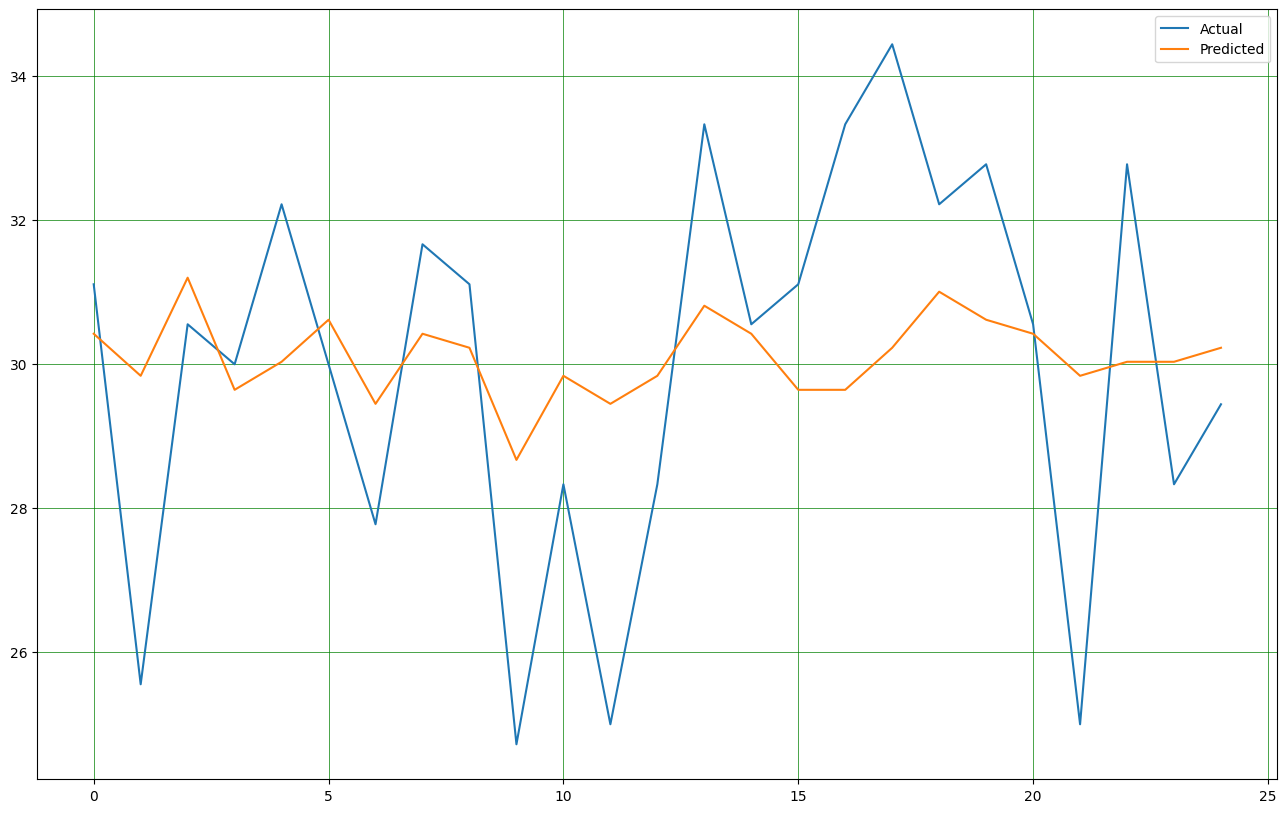

In [ ]:
df1 = df.head(25)
df1.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

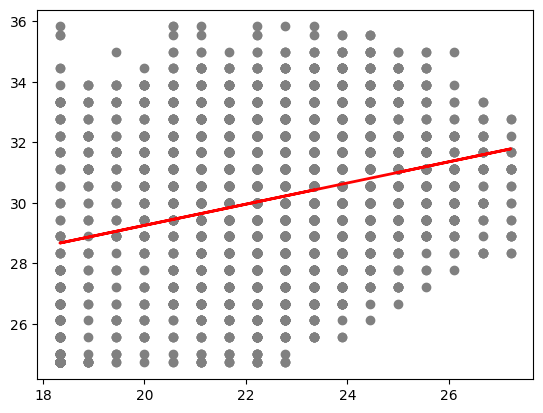

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

You can see that the value of root mean squared error is 4.19, which is more than 10% of the mean value of the percentages of all the temperature i.e. 22.41. This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [ ]:
dataset = pd.read_csv('winequality.csv')

In [ ]:
dataset.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
dataset.isnull().any()

,0
fixed acidity,False
volatile acidity,False
citric acid,False
residual sugar,False
chlorides,False
free sulfur dioxide,False
total sulfur dioxide,False
density,False
pH,False
sulphates,False


In [ ]:
X = dataset.drop("alcohol",axis=1)
y = dataset["alcohol"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_columns = X.columns
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled,columns=X_columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,5.632935
volatile acidity,0.757352
citric acid,0.757244
residual sugar,3.902417
chlorides,-0.534935
free sulfur dioxide,-0.281836
total sulfur dioxide,-0.273072
density,-7.865034
pH,4.703989
sulphates,1.562447


In [ ]:
y_pred = np.round(regressor.predict(X_test),1)
y_pred_train = np.round(regressor.predict(X_train),1)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [ ]:
df1 = df1.sort_values(by="Actual")

In [ ]:
df1.head()

,Actual,Predicted
60,9.2,10.2
669,9.2,9.4
181,9.3,9.8
194,9.7,9.9
790,9.7,10.0


In [ ]:
import seaborn as sns

<Axes: xlabel='Actual', ylabel='Predicted'>

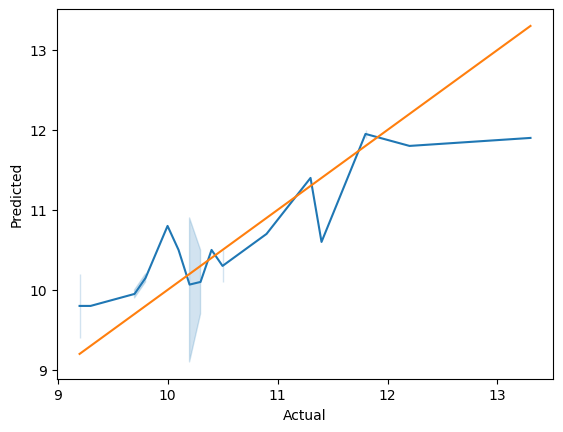

In [ ]:
sns.lineplot(data=df1, x="Actual", y="Predicted")
sns.lineplot(data=df1, x="Actual", y="Actual")

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
print("MAE:",round(mean_absolute_error(y_train,y_pred_train),2))
print("MAPE:",round(mean_absolute_percentage_error(y_train,y_pred_train)*100,2),"%")
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R**2:",round(r2_score(y_train,y_pred_train),2))

MAE: 0.46
MAPE: 4.35 %
RMSE: 0.6
R**2: 0.7


In [ ]:
print("MAE:",round(mean_absolute_error(y_test,y_pred),2))
print("MAPE:",round(mean_absolute_percentage_error(y_test,y_pred)*100,2),"%")
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
print("R**2:",round(r2_score(y_test,y_pred),2))

MAE: 0.44
MAPE: 4.22 %
RMSE: 0.57
R**2: 0.67


### Multiple Linear Regression

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# with sklearn
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn

print ('Predicted Stock Index Price: \n', regr.predict(X_test))


Intercept: 
 1431.790300853165
Coefficients: 
 [ 370.542 -194.839]
Predicted Stock Index Price: 
 [1023.322 1062.29   872.235  950.171  930.687]


## Case Study

**Dataset:** Novel Corona Virus 2019 Dataset

**Dataset Description:**
*   SNo: Serial Number
*   ObservationDate: Observation date in mm/dd/yyyy
*   Province/State: Province or State
*   Country/Region: Country or region
*   Last Update: Last update date time in UTC
*   Confirmed: Cumulative number of confirmed cases
*   Deaths: Cumulative number of deaths cases
*   Recovered: Cumulative number of recovered cases
*   Infected: Confirmed - Recovered – Deaths

You are a **Data Scientist** working for the **World Health Organization (WHO)**.

Due to the outbreak of **2019-nCoV**, WHO is alerted to several cases of pneumonia and wants to know how this virus will affect the population, specifically whether the Healthcare System in place is capable of addressing this issue.

Therefore, you are asked to predict the next **7 days** of cumulative **Confirmed, Infected, Recovered, and Death cases** for **2019-nCoV** using a **Linear Regression Model**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
data = pd.read_csv("covid_19_data.csv")
df = data.copy()

In [ ]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              6722 non-null   int64  
 1   ObservationDate  6722 non-null   object 
 2   Province/State   3953 non-null   object 
 3   Country/Region   6722 non-null   object 
 4   Last Update      6722 non-null   object 
 5   Confirmed        6722 non-null   float64
 6   Deaths           6722 non-null   float64
 7   Recovered        6722 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.3+ KB


In [ ]:
print(df['Last Update'].dtype)
print(df['Last Update'].head())

object
0    1/22/2020 17:00
1    1/22/2020 17:00
2    1/22/2020 17:00
3    1/22/2020 17:00
4    1/22/2020 17:00
Name: Last Update, dtype: object


In [ ]:
# changing dtype with pandas
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'], errors='coerce')

In [ ]:
df['Infected'] = df['Confirmed'] - df['Recovered'] - df['Deaths']
df['Infected'] = df['Infected'].clip(lower=0)

In [ ]:
df[df['Infected'] < 0].head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Infected


In [ ]:
daily_df = df.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered', 'Infected']].sum().reset_index()

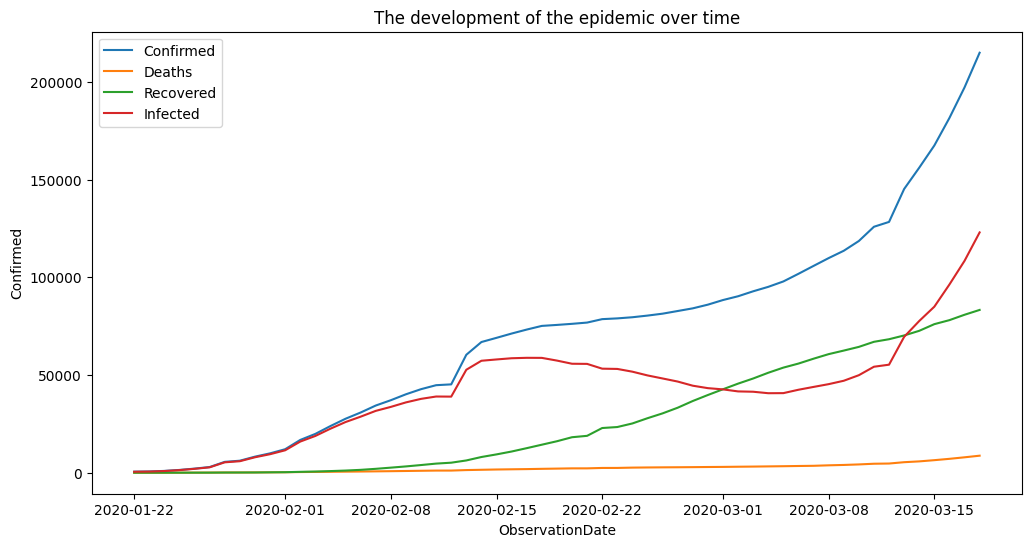

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_df, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=daily_df, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=daily_df, x='ObservationDate', y='Recovered', label='Recovered')
sns.lineplot(data=daily_df, x='ObservationDate', y='Infected', label='Infected')
plt.title("The development of the epidemic over time")
plt.legend()
plt.show()

In [ ]:
daily_df['Days'] = (daily_df['ObservationDate'] - daily_df['ObservationDate'].min()).dt.days

In [ ]:
X = daily_df[['Days']]
y = daily_df['Confirmed']

model = LinearRegression()
model.fit(X, y)

# Forecast for 7 days ahead
last_day = daily_df['Days'].max()

future_days = []
for i in range(1, 8):
    future_days.append([last_day + i])

forecast = model.predict(future_days)
print("Forecast of confirmed cases:", forecast)

Forecast of confirmed cases: [158934.3302005  161970.03366174 165005.73712298 168041.44058422
 171077.14404546 174112.8475067  177148.55096794]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


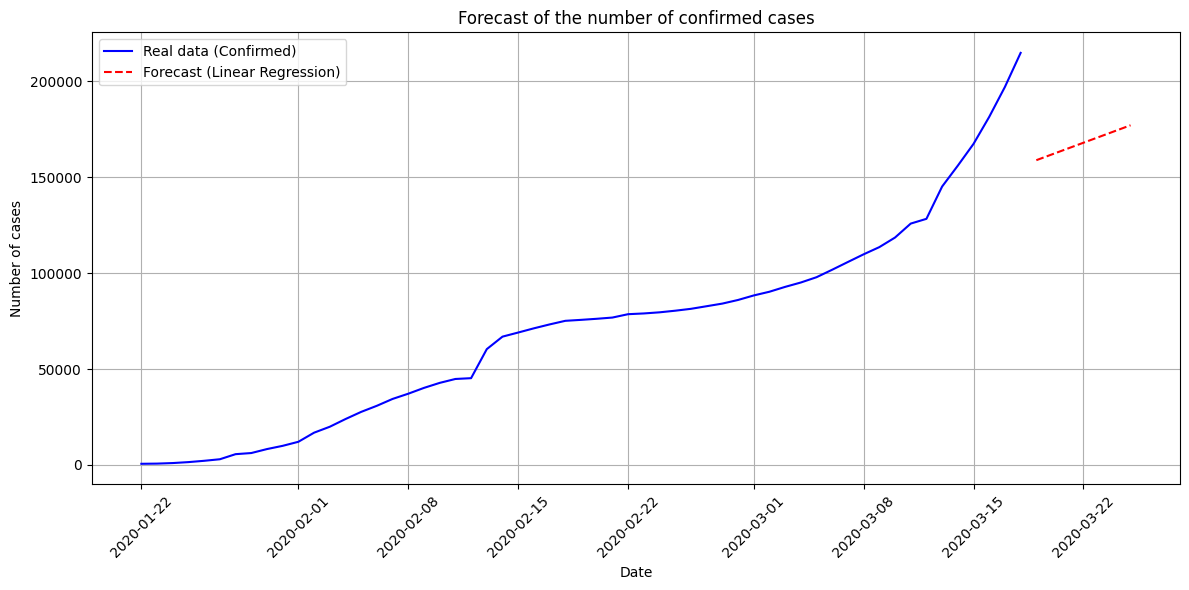

In [ ]:
x_real = daily_df['ObservationDate']
y_real = daily_df['Confirmed']

last_date = daily_df['ObservationDate'].max()
forecast_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 8)]

# --- 3. Рисуем график ---
plt.figure(figsize=(12, 6))

# Реальные значения
plt.plot(x_real, y_real, label='Real data (Confirmed)', color='blue')

# Прогноз
plt.plot(forecast_dates, forecast, label='Forecast (Linear Regression)', color='red', linestyle='--')
plt.title('Forecast of the number of confirmed cases')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Homework

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that
allows her to put in a few features of a house and returns back an estimate of what the house would sell for.


She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!


Your neighbor then gives you some information about a bunch of houses in regions of the United States, it is all in the data set: USA_Housing.csv.


The data contains the following columns:
* **Avg. Area Income**: Avg. Income of residents of the city house is located in.
* **Avg. Area House Age**: Avg Age of Houses in same city 'Avg. ‘
* **Area Number of Rooms**: Avg Number of Rooms for Houses in same city 'Avg.
* **Area Number of Bedrooms**: Avg Number of Bedrooms for Houses in same city.
* **Area Population**: Population of city house is located in
* **Price**: Price that the house sold at
* **Address**: Address for the house.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
df = pd.read_csv('USA_Housing.csv')

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


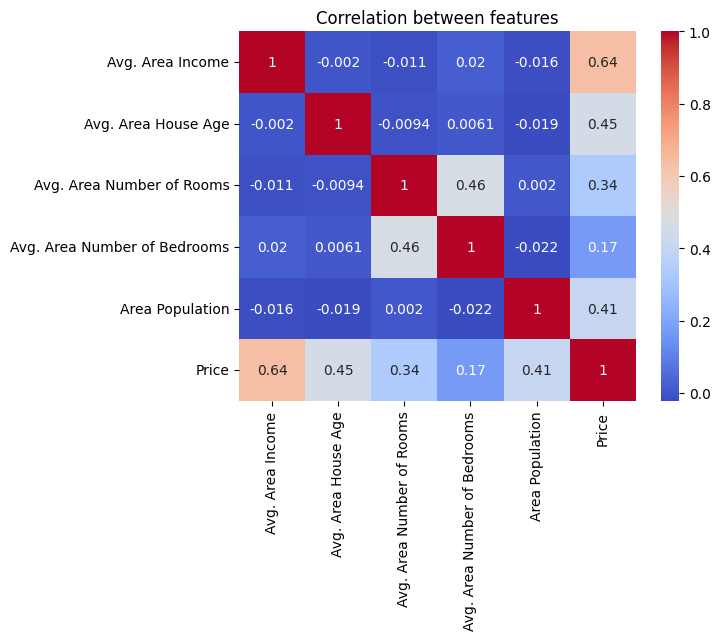

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between features")
plt.show()

In [11]:
df = df.drop(['Address'], axis=1)
X = df.drop('Price', axis=1)
y = df['Price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2: {r2}")

Mean Absolute Error (MAE): 81135.5660933687
R^2: 0.914681849875402


In [20]:
example_house = [[
    65000,   # Avg. Area Income
    5.5,     # Avg. Area House Age
    5,       # Area Number of Rooms
    3,       # Area Number of Bedrooms
    30000    # Area Population
]]

predicted_price = model.predict(example_house)
print(f"Forecasted house price: ${predicted_price[0]:,.2f}")

Forecasted house price: $740,470.31


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
